[0, 24.0, 30, 50, 60.0, 512.0]


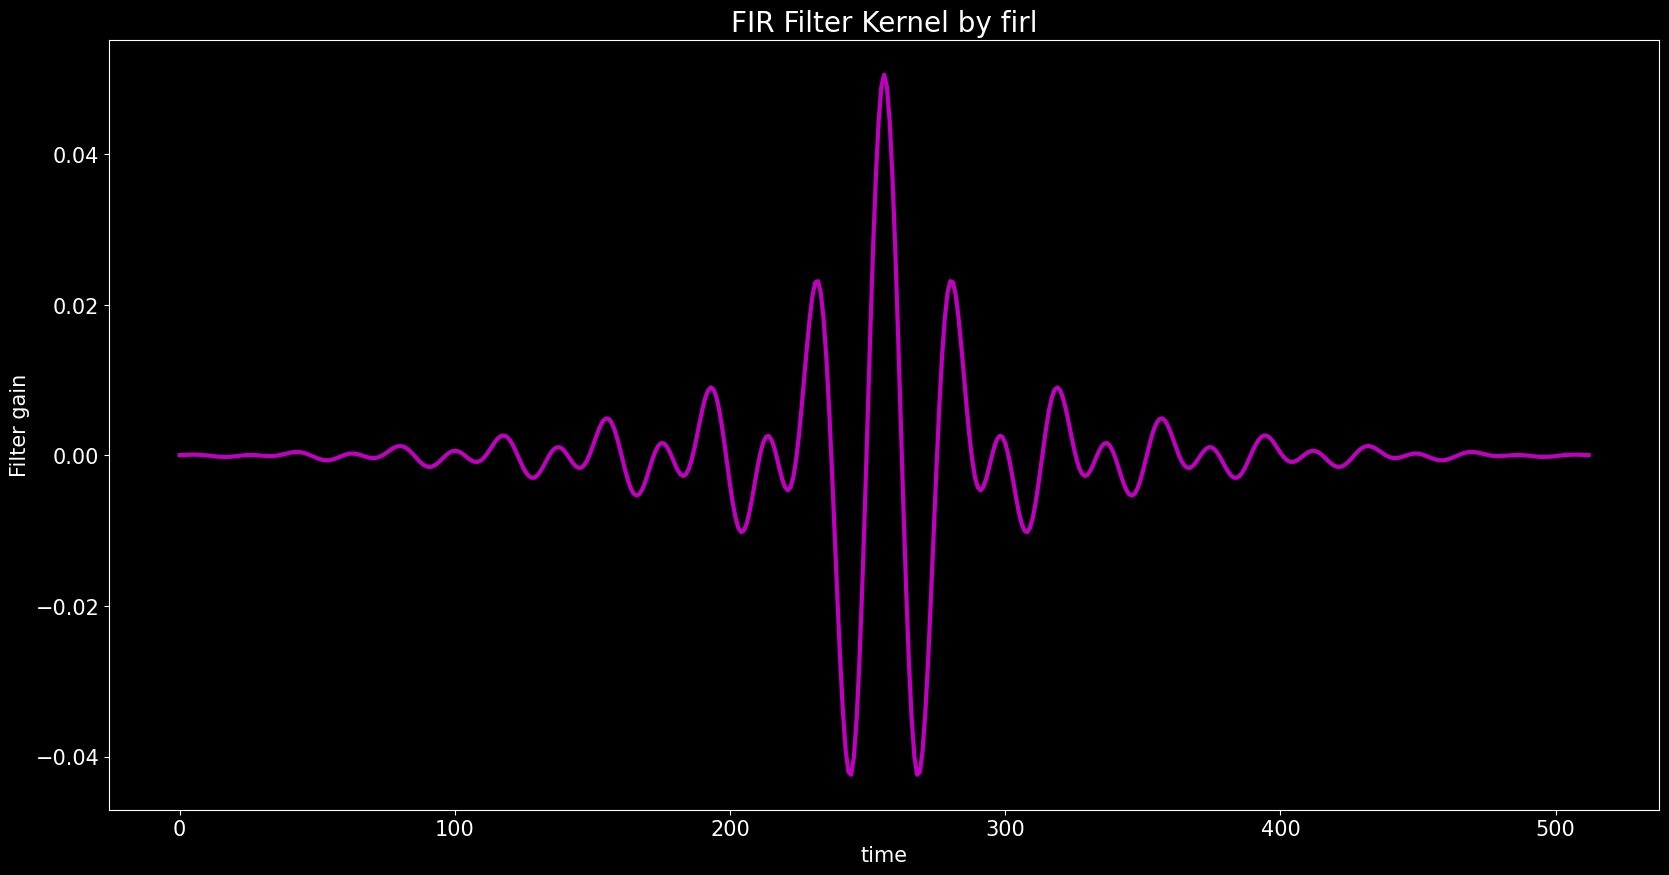

In [37]:
import matplotlib.pyplot as plt
import scipy
import numpy as np
from matplotlib import style
from scipy import signal
srate=1024
Nyquist=srate/2
cutoff=[30,50] #there are 2 cutoff frequencies lower and upper cutoff frequencies
transw=0.2# transition width is 23%
order=int(15*srate/cutoff[0]) #Order parameter is important .Here order is taken as 9 times the sampling rate
#and then divide with lowest frequency.Order of filter also called taps
#Order Must be odd
if order %2==0:
    order+=1
#Other filter specifications
desired_shape=[0,0,1,1,0,0]
frequencies=[0,cutoff[0]-cutoff[0]*transw,cutoff[0],cutoff[1],cutoff[1]+cutoff[1]*transw,Nyquist]
print(frequencies)
filt_kernal=signal.firls(order,frequencies,desired_shape,fs=srate)
plt.figure(figsize=(20,10))
style.use('dark_background')
plt.rcParams['xtick.labelsize']=15
plt.rcParams['ytick.labelsize']=15
plt.plot(filt_kernal,'m',linewidth=3)
plt.xlabel('time',fontsize=15)
plt.ylabel('Filter gain',fontsize=15)
plt.title('FIR Filter Kernel by firl',fontsize=20)
plt.show()




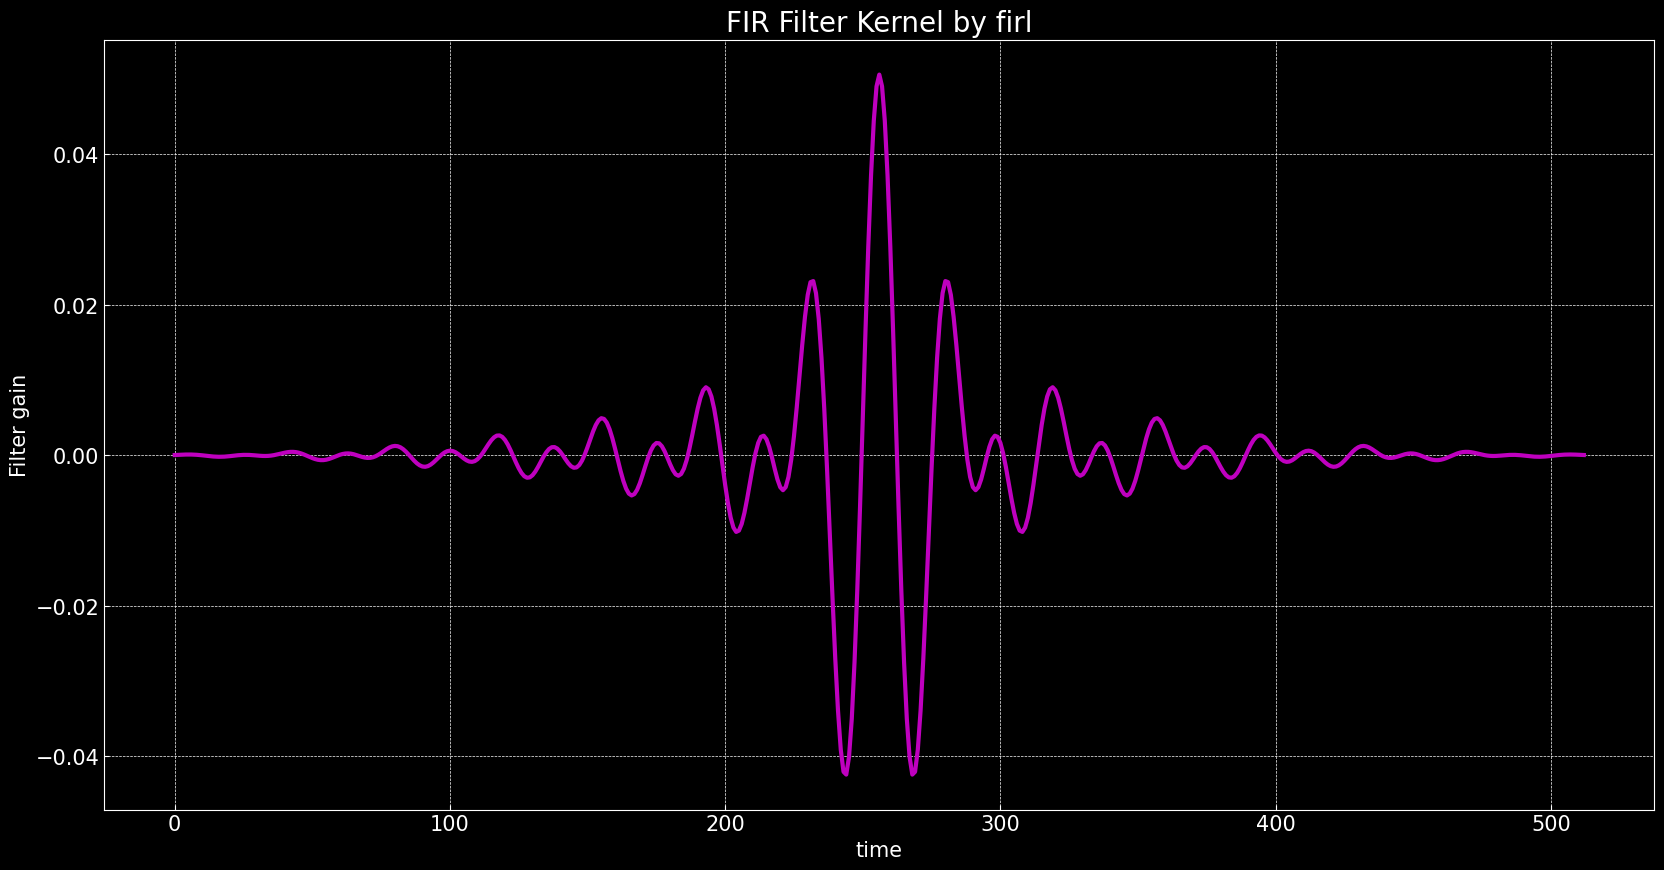

In [40]:
filt_kernal=signal.firls(order,frequencies,desired_shape,fs=srate)
plt.figure(figsize=(20,10))
style.use('dark_background')
plt.rcParams['xtick.labelsize']=15
plt.rcParams['ytick.labelsize']=15
plt.plot(filt_kernal,'m',linewidth=3)
plt.xlabel('time',fontsize=15)
plt.ylabel('Filter gain',fontsize=15)
plt.title('FIR Filter Kernel by firl',fontsize=20)
plt.show()

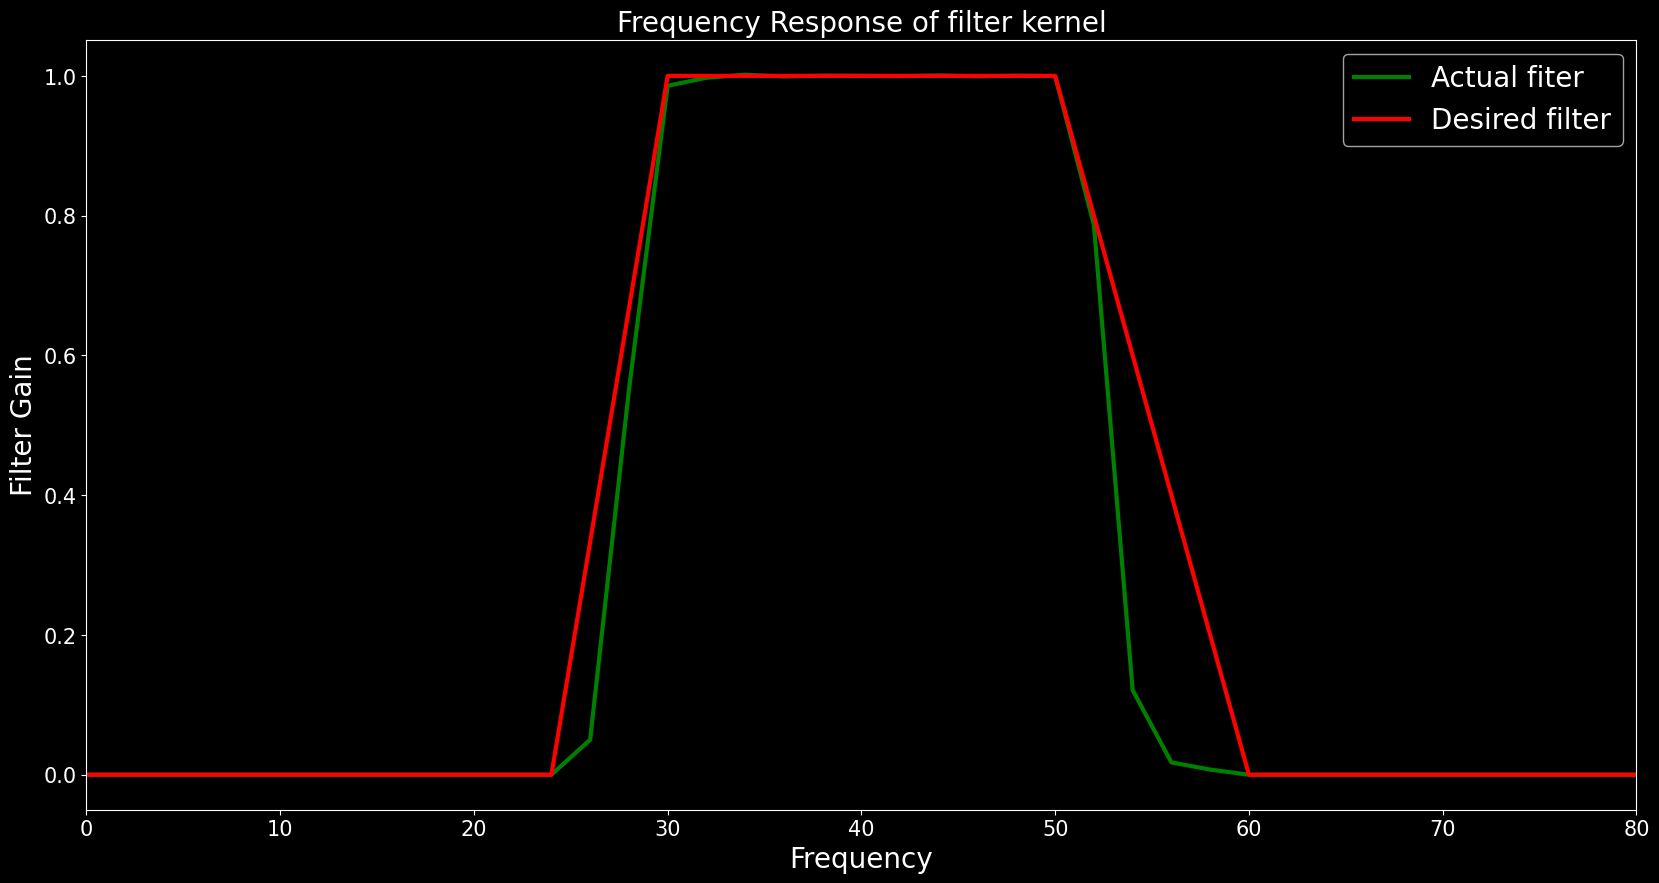

In [ ]:
kernel_power=np.abs(scipy.fft.fft(filt_kernal))**2
Hz=np.linspace(0,srate/2,int(np.floor(len(filt_kernal)/2)+1))
kernel_power=kernel_power[0:len(Hz)]
plt.figure(figsize=(20,10))
style.use('dark_background')
plt.rcParams['xtick.labelsize']=15
plt.rcParams['ytick.labelsize']=15
plt.plot(Hz,kernel_power,'g',linewidth=3,label='Actual fiter')
plt.plot(frequencies,desired_shape,'r',linewidth=3,label='Desired filter')
plt.xlim([0,80])
plt.xlabel('Frequency',fontsize=20)
plt.ylabel('Filter Gain',fontsize=20)
plt.legend(fontsize=20)
plt.title('Frequency Response of filter kernel',fontsize=20)
plt.show()